Data for this project was downloaded using Kaggle API. Following two line commands were used in command line interface. Note that only train.csv and structures.csv would be used in this project.
<img src="API_command.png">

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
train = pd.read_csv('train.csv')
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [4]:
train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4659076 entries, 0 to 4659075
Data columns (total 6 columns):
id                          4659076 non-null int64
molecule_name               4659076 non-null object
atom_index_0                4659076 non-null int64
atom_index_1                4659076 non-null int64
type                        4659076 non-null object
scalar_coupling_constant    4659076 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 213.3+ MB


There is no null in the 'train' dataframe.

In [5]:
train.describe()

,id,atom_index_0,atom_index_1,scalar_coupling_constant
count,4.659076e+06,4.659076e+06,4.659076e+06,4.659076e+06
mean,2.329538e+06,1.335677e+01,5.881245e+00,1.591591e+01
std,1.344960e+06,3.269432e+00,4.993794e+00,3.493466e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,-4.476050e+01
25%,1.164769e+06,1.100000e+01,2.000000e+00,-2.551463e-01
50%,2.329538e+06,1.300000e+01,5.000000e+00,2.280350e+00
75%,3.494306e+06,1.600000e+01,8.000000e+00,7.389100e+00
max,4.659075e+06,2.800000e+01,2.800000e+01,2.077090e+02


As expected, scalar coupling constant could be negative and positive. 
Another piece of information that might be useful is that scalar coupling constant is mutual, namely JAX= JXA (A and X are two different atoms).

In [54]:
train.duplicated().any()

False

There is no duplicated rows in train.

In [93]:
print('There are {} entries in train.csv'.format(len(train)))
print('There are {} different molecules in train.csv.'
      .format(train.molecule_name.nunique()))
print('There are {} different kinds of coupling types in train.csv.'
     .format(train.type.nunique()))

There are 4659076 entries in train.csv
There are 85012 different molecules in train.csv.
There are 8 different kinds of coupling types in train.csv.


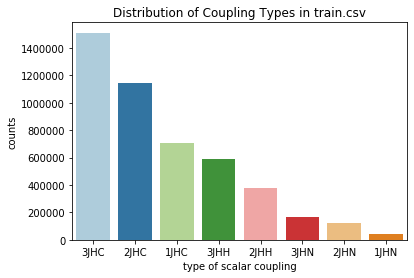

In [12]:
s1 = train.type.value_counts()
sns.barplot(x=s1.index, y=s1, palette='Paired')
plt.xlabel('type of scalar coupling')
plt.ylabel('counts')
plt.title('Distribution of Coupling Types in train.csv')
plt.show()

From the barplot above, we can see that three-bond coupling (3J) between carbon (C) and hydrogen(H) is the most common coupling type, and one-bond coupling (1J) between hydrogen(H) and nitrogen(N) is the most rare in train.csv.

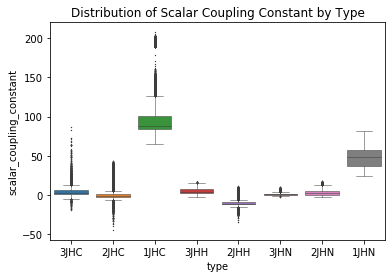

In [101]:
sns.boxplot(x='type',
            y='scalar_coupling_constant', 
            data=train,
            linewidth=0.5,
            fliersize=0.5,
            order=s1.index)
plt.title('Distribution of Scalar Coupling Constant by Type')
plt.show()

The boxplot above shows the dirtsibution of scalar coupling constant by type. All one-bond couplings including 1JHC and 1JHN has positive scalar coupling constant as expected, and for most of 3JHCC, scalar coupling constants are positive or very close to 0. It appears that one-bond coupling (1J) between H and C has the hightest overall magnitude.

In [14]:
structures = pd.read_csv('structures.csv')
structures.head()

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [164]:
structures.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358875 entries, 0 to 2358874
Data columns (total 6 columns):
molecule_name    2358875 non-null object
atom_index       2358875 non-null int64
atom             2358875 non-null object
x                2358875 non-null float64
y                2358875 non-null float64
z                2358875 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 108.0+ MB


There is no null values in 'structures' dataframe.

In [162]:
structures.describe()

,atom_index,x,y,z
count,2.358875e+06,2.358875e+06,2.358875e+06,2.358875e+06
mean,8.757255e+00,9.495981e-02,-3.335625e-01,6.239050e-02
std,5.592444e+00,1.655403e+00,1.989328e+00,1.445876e+00
min,0.000000e+00,-9.234889e+00,-9.933938e+00,-9.134765e+00
25%,4.000000e+00,-8.746228e-01,-1.826097e+00,-8.424758e-01
50%,9.000000e+00,5.183962e-02,-4.034906e-01,1.092888e-02
75%,1.300000e+01,1.116163e+00,1.373848e+00,9.393901e-01
max,2.800000e+01,9.382240e+00,1.018196e+01,7.894733e+00


In [55]:
structures.duplicated().any()

False

There is no duplicated rows in structures.

In [95]:
print('There are {} entried in structures.csv.'.format(len(structures)))
print('There are {} different molecules in structures.csv.'
      .format(structures.molecule_name.nunique()))
print('There are {} different kinds of atoms in structures.csv.'
     .format(structures.atom.nunique()))

There are 2358875 entried in structures.csv.
There are 130789 different molecules in structures.csv.
There are 5 different kinds of atoms in structures.csv.


Structures.csv contains much more molecules than does train.csv, including those not present in train.csv.

In [83]:
structures.atom.value_counts()

H    1208486
C     831809
O     183202
N     132382
F       2996
Name: atom, dtype: int64

There 2996 atom pairs that contain Fluorine(F), and this project does not require prediction of scalar coupling constant for any pair that contains F.

In [61]:
train['bond_length'] = train['type'].str[0]
train['atom_0'] = train['type'].str[2]
train['atom_1'] = train['type'].str[3]

train.head(10)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,bond_length,atom_0,atom_1
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1,H,C
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,2,H,H
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,2,H,H
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,2,H,H
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,1,H,C
5,5,dsgdb9nsd_000001,2,3,2JHH,-11.2541,2,H,H
6,6,dsgdb9nsd_000001,2,4,2JHH,-11.2548,2,H,H
7,7,dsgdb9nsd_000001,3,0,1JHC,84.8093,1,H,C
8,8,dsgdb9nsd_000001,3,4,2JHH,-11.2543,2,H,H
9,9,dsgdb9nsd_000001,4,0,1JHC,84.8095,1,H,C


The column of type of coupling (e.g. 1JHC) was broken down into different columns containing one single piece of attribute (e.g. 1 for bond_length, H for atom_x, C for atom_y) for convenience of analysis.


In [62]:
df = train.merge(structures, 
                 how='left', 
                 left_on=['molecule_name', 'atom_index_0', 'atom_0'], 
                 right_on=['molecule_name', 'atom_index', 'atom']).merge(structures, 
                 how='left', 
                 left_on=['molecule_name', 'atom_index_1', 'atom_1'], 
                 right_on=['molecule_name', 'atom_index', 'atom'], suffixes=['_0', '_1'])
df.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,bond_length,atom_0,atom_1,atom_index_0,atom_0,x_0,y_0,z_0,atom_index_1,atom_1,x_1,y_1,z_1
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1,H,C,1,H,0.002150,-0.006031,0.001976,0,C,-0.012698,1.085804,0.008001
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,2,H,H,1,H,0.002150,-0.006031,0.001976,2,H,1.011731,1.463751,0.000277
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,2,H,H,1,H,0.002150,-0.006031,0.001976,3,H,-0.540815,1.447527,-0.876644
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,2,H,H,1,H,0.002150,-0.006031,0.001976,4,H,-0.523814,1.437933,0.906397
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,1,H,C,2,H,1.011731,1.463751,0.000277,0,C,-0.012698,1.085804,0.008001


In [92]:
final = df.loc[:, ~df.columns.duplicated()].set_index('id')
final.head()

,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,bond_length,atom_0,atom_1,x_0,y_0,z_0,x_1,y_1,z_1
id,,,,,,,,,,,,,,
0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1,H,C,0.002150,-0.006031,0.001976,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,2,H,H,0.002150,-0.006031,0.001976,1.011731,1.463751,0.000277
2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,2,H,H,0.002150,-0.006031,0.001976,-0.540815,1.447527,-0.876644
3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,2,H,H,0.002150,-0.006031,0.001976,-0.523814,1.437933,0.906397
4,dsgdb9nsd_000001,2,0,1JHC,84.8074,1,H,C,1.011731,1.463751,0.000277,-0.012698,1.085804,0.008001


Duplicated columns and type column need to be removed.

In [93]:
p0 = final[['x_0', 'y_0', 'z_0']].values 
p1 = final[['x_1', 'y_1', 'z_1']].values
final['distance'] = np.linalg.norm(p0 - p1, axis=1)
final.head()

,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,bond_length,atom_0,atom_1,x_0,y_0,z_0,x_1,y_1,z_1,distance
id,,,,,,,,,,,,,,,
0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1,H,C,0.002150,-0.006031,0.001976,-0.012698,1.085804,0.008001,1.091953
1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,2,H,H,0.002150,-0.006031,0.001976,1.011731,1.463751,0.000277,1.783120
2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,2,H,H,0.002150,-0.006031,0.001976,-0.540815,1.447527,-0.876644,1.783147
3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,2,H,H,0.002150,-0.006031,0.001976,-0.523814,1.437933,0.906397,1.783157
4,dsgdb9nsd_000001,2,0,1JHC,84.8074,1,H,C,1.011731,1.463751,0.000277,-0.012698,1.085804,0.008001,1.091952


 ref https://www.kaggle.com/seriousran/just-speed-up-calculate-distance-from-benchmark to efficiently calculate distance between 2 points with cartesian coordinate values.

In [79]:
#for index, row in final.iterrows():
#    row['distance'] = ((row['x_0'] - row['x_1'])**2 + (row['y_0'] - row['y_1'])**2 + (row['z_0'] - row['z_1'])**2)**0.5
#tooooo slow

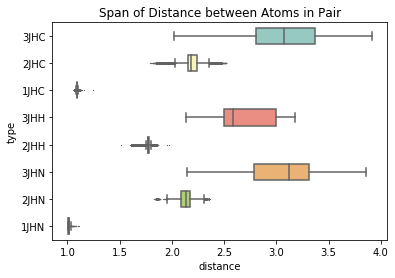

In [104]:
sns.boxplot(x='distance', 
            y='type', 
            data=final, 
            width=0.6, 
            fliersize=0.4,
            palette='Set3',
            order=s1.index)
plt.title('Span of Distance between Atoms in Pair')
plt.show()

From the boxplot above, we can see that in general the atom pairs of three-bond coupling are more far apart than those of one-bond coupling.

In [157]:
g = (train[train['type'] == s1.index[i]] for i in range(len(s1)))
train_3JHC = next(g)
train_2JHC = next(g)
train_1JHC = next(g)
train_3JHH = next(g)
train_2JHH = next(g)
train_3JHN = next(g)
train_2JHN = next(g)
train_1JHN = next(g)